# 2.1 신경망과의 첫 만남
---------
* keras는 datasets에 mnist와 함께, 여러가지 기본데이터를 가지고 있음
   1. 구조
   2. 컴파일 단계
      * Loss ftn
      * Optimizer
      * 평가
   3. test _ 검정
      * evaluate

In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


C:\Users\korea\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
import numpy as np
import pandas as pd

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
print(np.min(np.unique(x_train)))
np.max(np.unique(x_train))

0


255

In [10]:
train_images = x_train.reshape((60000,28*28))
test_images = x_test.reshape((10000,28*28))

* scaling : 딥러닝은 스케일에 민감하여, 적절한 전처리 과정 필요
* label의 범주화
   * to_categorical

In [11]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [12]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [13]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(196, activation='selu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))
network.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['acc','mae'])

In [14]:
network.fit(train_images,train_labels,epochs=10, batch_size = 128)

Epoch 1/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3533 - acc: 0.8994 - mean_absolute_error: 0.0351
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.2275 - acc: 0.9346 - mean_absolute_error: 0.0223
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.1685 - acc: 0.9526 - mean_absolute_error: 0.0172
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.1319 - acc: 0.9619 - mean_absolute_error: 0.0138
Epoch 5/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.1045 - acc: 0.9699 - mean_absolute_error: 0.0114
Epoch 6/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0856 - acc: 0.9745 - mean_absolute_error: 0.0096
Epoch 7/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0722 - acc: 0.9790 - mean_absolute_error: 0.0082
Epoch 8/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0602 - ac

In [15]:
test_loss, test_acc, test_mae  = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 24us/step


In [16]:
'test_loss: {:.5f}  test_acc: {:.5f} test_mae: {:.5f} '.format(test_loss,test_acc,test_mae)

'test_loss: 0.08487  test_acc: 0.97460 test_mae: 0.00768 '

# 2.2 Tensor
---------
* 신경망을 위한 데이터 표현 텐서(Tensor)
   * numpy 배열에 데이터를 저장에서 부터 시작
      * 축의 개수 (rank) 
      * 크기 (shape)
      * 타입 (dtype)
         * dimension 을  axis로 표현
         * ndim : 축의 개수 | Rank
         * scalar : 0D 텐서
         * vector : 1D 텐서
         * matrix : 2D 텐서


In [17]:
x = np.array(10)
type(x)


numpy.ndarray

In [18]:
x

array(10)

In [19]:
x.ndim

0

In [20]:
x = np.array([10,13])
x.ndim

1

In [21]:
x = np.array([np.arange(10,13),np.arange(13,16)])
x.ndim

2

In [22]:
x

array([[10, 11, 12],
       [13, 14, 15]])

In [23]:
x = np.stack([np.vstack([x,x]),np.vstack([x,x])])
np.ndim(x)

3

In [24]:
x

array([[[10, 11, 12],
        [13, 14, 15],
        [10, 11, 12],
        [13, 14, 15]],

       [[10, 11, 12],
        [13, 14, 15],
        [10, 11, 12],
        [13, 14, 15]]])

In [25]:
x_train.dtype

dtype('uint8')

###  시각화
--------

In [26]:
digit = x_train[4]

In [27]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

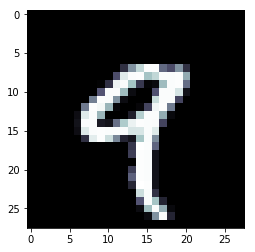

In [28]:
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.bone)

## 넘파이로 텐서 조작
* 슬라이싱

In [29]:
my_slice = x_train[:100]
my_slice.shape

(100, 28, 28)

* 14X14 슬라이싱 - 왼쪽 위

In [30]:
print(x_train[:100,:14,:14].shape)

(100, 14, 14)


* 14X14 슬라이싱 - 정중앙
   * 7에서 부터 -7까지

In [31]:
x_train[:100,7:-7,7:-7].shape

(100, 14, 14)

In [32]:
x.shape
x[0,]

array([[10, 11, 12],
       [13, 14, 15],
       [10, 11, 12],
       [13, 14, 15]])

In [33]:
x[0,0:-1]

array([[10, 11, 12],
       [13, 14, 15],
       [10, 11, 12]])

In [34]:
x[0,1:-1,0:-1]

array([[13, 14],
       [10, 11]])

## 텐서 연산
* element-wise operation : 벡터 곱
   * numpy는 기본 선형대수를 구현함 
       * 매우 효율적 : C, Fortran

In [36]:
import keras

In [38]:
def relu(x):
    return max(x,0)
relu(2)

2

In [42]:
def naive_relu(x): # 2D tensor
    assert len(x.shape) == 2 ## 참이면 프로그램 계속 실행 , 거짓이면 중단
    
    x = x.copy()
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j]= max(x[i,j],0)
            
    return x

In [44]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
        
    x = x.copy()
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [45]:
def naive_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    
    assert x.shape[1] == y.shape[0]
    

    x = x.copy()
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [50]:
import numpy as np

x = np.random.random((64,3,32,10))
y = np.random.random((32, 10))

In [52]:
z = np.maximum(x,y)

In [69]:
z.shape
print(x[0,0,:,:])
print(y[0,:])
print(z[0,0,:,:])

[[0.01679119 0.44800468 0.18375292 0.67329868 0.66753853 0.00214865
  0.90894655 0.00891154 0.78002402 0.11648284]
 [0.72795288 0.48814889 0.42834584 0.41405708 0.2306869  0.26896058
  0.93810942 0.74064947 0.59048654 0.36506636]
 [0.9821005  0.78653557 0.71995638 0.1532624  0.87656033 0.14564953
  0.78616681 0.93789326 0.81697296 0.19152877]
 [0.241725   0.4555305  0.1248715  0.39296499 0.14221636 0.8480205
  0.65722064 0.93192691 0.17760069 0.50816643]
 [0.81827868 0.80645292 0.16818633 0.64306776 0.7119059  0.23959473
  0.56772315 0.68911998 0.28104781 0.00530768]
 [0.67371823 0.2490989  0.14045262 0.683299   0.52347688 0.33242839
 [0.61280986 0.89506814 0.43687891 0.82688269 0.66606153 0.69342805
  0.58235102 0.67949105 0.15818529 0.82666406]
 [0.39254764 0.18759805 0.68237951 0.8903173  0.78166169 0.90779151
  0.7335079  0.63239118 0.25070613 0.45247045]
 [0.78656999 0.61670147 0.76442561 0.42174066 0.38289831 0.75049175
  0.24079094 0.99289774 0.61005494 0.25413978]
 [0.88534771 

## 텐서 곱(Dot Product)
* dot product : *
   * 텐서프로우 : tf.matmul
   * 케라스 : keras import as K ; K.dot(x,y)

In [71]:
z = np.dot(x,y)

ValueError: shapes (64,3,32,10) and (32,10) not aligned: 10 (dim 3) != 32 (dim 0)

In [58]:
x * y

array([[[[1.57242967e-02, 1.51475504e-01, 3.32335623e-02, ...,
          7.64548014e-03, 1.88967280e-01, 1.82031101e-02],
         [6.74894233e-01, 2.15254710e-01, 2.21853811e-03, ...,
          6.88646010e-01, 5.90813608e-02, 1.17070477e-02],
         [5.83444416e-01, 2.45930397e-01, 4.42086395e-01, ...,
          5.38590254e-01, 7.66793493e-01, 1.41307184e-01],
         ...,
         [4.58995340e-01, 1.83388559e-01, 7.20577628e-01, ...,
          2.75235708e-02, 3.67518794e-01, 6.70989698e-02],
         [8.82436476e-03, 3.58062082e-01, 3.34291299e-01, ...,
          8.64824672e-02, 5.34375062e-04, 2.74703218e-01],
         [3.03885207e-02, 1.22846105e-01, 6.79124495e-01, ...,
          1.99713140e-01, 2.34194655e-01, 1.24683665e-02]],

        [[8.48330758e-01, 2.86435189e-01, 1.61149603e-01, ...,
          7.75719798e-01, 2.05278798e-01, 6.69312043e-02],
         [3.61863388e-01, 4.03859870e-01, 3.55263881e-03, ...,
          1.68253307e-01, 5.37393558e-02, 2.74967749e-02],
        

In [72]:
def naive_vector_dot(x,y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]  
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [73]:
def naive_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0])    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [74]:
train_images = train_images.reshape((60000, 28*28))

In [77]:
x = np.array([[0.,1.],[2.,3.],[4.,5.]])
x

array([[0., 1.],
       [2., 3.],
       [4., 5.]])

In [78]:
x.shape

(3, 2)

In [82]:
x.reshape(6,1)

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [84]:
x.reshape(2,3)

array([[0., 1., 2.],
       [3., 4., 5.]])

In [86]:
x.T


array([[0., 2., 4.],
       [1., 3., 5.]])

In [89]:
train_images.max()

1.0

In [93]:
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))
            
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc']) # 엮다, 편집하다

In [96]:
network.fit(train_images,train_labels,epochs=5,batch_size= 128)

Epoch 1/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.2548 - acc: 0.9264
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.1014 - acc: 0.9700
Epoch 3/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0669 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0492 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0373 - acc: 0.9888
